# Identifying Precise Forecasters on r/Wallstreetbets
**BrainStation Data Science Bootcamp - Capstone Project**

**Author: L Gavrilova**

**Date: 6 November 2023**

# Notebook 2A - Labelled dataset - EDA

## 2.0. Introduction

Notebooks 2A and 2B are designed for text cleaning for the labelled dataset (Notebook 2A) and the reddit dataset (Notebook 2B).  

In this notebook 2A I perform the following steps:

1. I load the reddit dataset and perform the following text cleaning steps:

* removing rows with missing values
* removing empty spaces
* correcting labels in the target column
* removing website inks (urls), hashtags (#) and mentions (@)
* the resulting dataset is then saved into a csv file
* an additional cleaning step is performed by removing and isolating emojis into a separate column.  This information can be useful during feature engineering steps, so I don’t want to lose this indicator of sentiment. 
* finally, slang words and emojis used inside the wallstreetbets community and not obvious to outsiders are replaced with normal English words and phrases. For that, I created a csv file names "WSB dictionary" where I mapped the WSB slang with corresponding common English words. 

The result is a csv file that is prepared for further machine learning techniques. 


## 2.1. Cleaning Text

### 2.1.1. Data Loading and Basic Checks

In [94]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

import re
import emoji
import os

# Setting display options
plt.rcParams['figure.figsize'] = (6.0, 4.0)  # setting figure size
pd.set_option('display.float_format', '{:.2f}'.format)  # Set the float display option
pd.set_option('display.max_colwidth', None)

In [47]:
df = pd.read_csv('../data/annotation file 3600 done 1142022.csv')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   link_id    5001 non-null   object
 1   parent_id  5001 non-null   object
 2   User       5001 non-null   object
 3   Text       5001 non-null   object
 4   Intent     5001 non-null   object
 5   Support    5001 non-null   object
dtypes: object(6)
memory usage: 235.4+ KB


In [54]:
df.sample(5)

,link_id,parent_id,User,Text,Intent,Support
4132,t3_l6jej9,t3_l6jej9,thiccboul,"This shit just got personal, dont sell till these hedgefuckers are in the dirt where they belong 💎🤲💎🤲💎🤲 \nGME TO THE MOON🚀🚀🚀",u,y
936,t3_ms17e4,t1_gurp71x,Overwatch_preachy,"Im talking , interest, game had become something that is being followed worldwide, that's not delusion",u,u
1774,t3_lbmppv,t1_gluzoed,GoldenKaze,"She also has an onlyFans, she never left the game, she just plays by different rules",u,u
358,t3_knfly4,t3_knfly4,InfiniteAccuracy,I thought he was shorting GME.,u,u
3394,t3_kadem4,t1_gfav7tm,Chuck_Embargo,I agree...tthere's also paid poster who post anti-GME sentiment sent from the shorts,u,y


In [55]:
df.describe()

,link_id,parent_id,User,Text,Intent,Support
count,5001,5001,5001,5001,5001,5001
unique,1948,3153,4662,4952,6,4
top,t3_ladzdt,t3_ladzdt,AutoModerator,GME,u,y
freq,66,46,14,22,3246,2473


In [56]:
df['link_id'].nunique() == df.shape[0]

False

In [57]:
df.isna().sum()/df.shape[0]

link_id     0.00
parent_id   0.00
User        0.00
Text        0.00
Intent      0.00
Support     0.00
dtype: float64

In [58]:
df[ df['Text'].isna() ]

,link_id,parent_id,User,Text,Intent,Support
5001,NaN,NaN,NaN,NaN,NaN,NaN
5002,NaN,NaN,NaN,NaN,NaN,NaN
5003,NaN,NaN,NaN,NaN,NaN,NaN
5004,NaN,NaN,NaN,NaN,NaN,NaN
5005,NaN,NaN,NaN,NaN,NaN,NaN
5006,NaN,NaN,NaN,NaN,NaN,NaN
5007,NaN,NaN,NaN,NaN,NaN,NaN
5008,NaN,NaN,NaN,NaN,NaN,NaN
5009,NaN,NaN,NaN,NaN,NaN,NaN
5010,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# Dropping rows that have NaN values
df = df.dropna()

In [60]:
df[ df['Text'].isna() ]

,link_id,parent_id,User,Text,Intent,Support


### 2.1.2. Correcting values in the 'Intent' collumn

In [61]:
df['Intent'].value_counts()

Intent
u     3246
y      983
m      370
i      318
n       83
 u       1
Name: count, dtype: int64

In [62]:
df['Support'].value_counts()

Support
y    2473
u    1979
n     292
i     257
Name: count, dtype: int64

In [63]:
# Replacing ' u' with 'u' in the 'Intent' column
df['Intent'] = df['Intent'].str.replace(' u', 'u', regex=False)
# checking again:
value_counts = df['Intent'].value_counts() 
print(value_counts)

Intent
u    3247
y     983
m     370
i     318
n      83
Name: count, dtype: int64


### 2.1.3. EDA of text columns

In [64]:
# Get the counts of each unique value in the 'User' column
user_counts = df['User'].value_counts()

# Print the value counts
print(user_counts)

User
AutoModerator        14
[deleted]            11
MLBBear               7
lucasjhinton          7
LavenderAutist        5
                     ..
kaptainkooleio        1
HolderToTheMoon       1
No_Balance_3566       1
Castranada            1
AcceptableSilver2     1
Name: count, Length: 4662, dtype: int64


In [65]:
# Display the top 10 most frequent users
print(user_counts.head(10))

User
AutoModerator      14
[deleted]          11
MLBBear             7
lucasjhinton        7
LavenderAutist      5
budispro            5
MadmantheDragon     5
Qikqok              5
singh161798         4
Keepitlitt          4
Name: count, dtype: int64


In [66]:
# Get the counts of each unique value in the 'User' column
parentid_counts = df['parent_id'].value_counts()

# Print the value counts
print(parentid_counts)

parent_id
t3_ladzdt     46
t3_lat43j     38
t3_kx3ja5     33
t3_layuxv     32
t3_lb6aiq     29
              ..
t3_l6jj4d      1
t3_law9mf      1
t3_lqttmb      1
t3_mn1hr2      1
t1_gltj1f7     1
Name: count, Length: 3153, dtype: int64


In [67]:
# Creating a new column with word count that will calculate the total number of words in the column "Text"
df['word_count'] = df['Text'].str.split().str.len()

In [68]:
# Having a look at the distribution of word counts in 'Text' column:
df['word_count'].value_counts()

word_count
11     191
10     177
8      168
13     165
9      164
      ... 
195      1
513      1
215      1
194      1
153      1
Name: count, Length: 228, dtype: int64

In [69]:
print(df['word_count'].value_counts().max())

191


Observation:

* Many postings have a very small word count, 9-13 words per message (one sentence). 

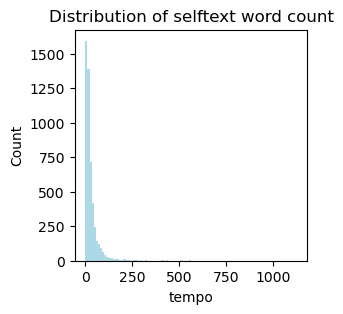

In [70]:
# Plot a histogram of selftext word counts
plt.figure(figsize=(3,3))
df.word_count.hist(bins=100, grid=False, color='lightblue')
plt.title('Distribution of selftext word count')
plt.xlabel('tempo')
plt.ylabel('Count')
plt.show()

Observation: 

The distribution of word count is extremely skewed, with majority (>75%) of posts having a very small number of words.  But a very small percentage of authors posted lengthy posts that skewed the right tail a lot. I will plot the distribution of selftext word count between 2 and 1000 words. We can see that majority of non-empty posts have between 2 and 200 words.   

### 2.1.4. Cleaning the text before modelling

In [95]:
df_clean = df.copy() 

In [96]:
# Function to clean text
def purge_content(text):
    text_without_urls = re.sub(r'https?://\S+|www\.\S+', '', text)
    text_without_hashtags = re.sub(r'#\S+', '', text_without_urls)
    text_without_mentions = re.sub(r'@\S+', '', text_without_hashtags)
    text_without_linebreaks = re.sub(r'\n+', '', text_without_mentions)
    clean_text = re.sub(r'\n+', ' ', text_without_linebreaks)

    return clean_text

In [97]:
# Using apply() method to clean the text
df_clean['Text'] = df_clean['Text'].apply(purge_content)

In [98]:
# sanity check
df_clean[df_clean['Text'] == '']

,link_id,parent_id,User,Text,Intent,Support,word_count
402,t3_l66caa,t1_gkyxvml,EllipticalOrbitMan,,i,i,1
1264,t3_l0mc06,t1_gju8jei,wolfiasty,,i,i,1
2187,t3_l6kqyk,t1_gl17oj6,EconomicallyLiterate,,i,i,1
4157,t3_khq3x2,t1_ggo6fi4,JonBoy82,,i,i,1
4265,t3_lat43j,t1_glq69gz,Free_Joty,,i,i,1


In [102]:
# Drop rows where the 'Text' column is an empty string
df_clean = df_clean[df_clean['Text'] != '']

In [106]:
df_clean.duplicated().sum()

0

In [107]:
# Remove duplicate rows
df_clean = df_clean.drop_duplicates()

In [108]:
# Recording the cleaned dataset as a new csv file to be used in other notebooks:
# Save the DataFrame to a CSV file
df_clean.to_csv('../data/02_labelled_dataset_cleaned.csv', index=False)

### 2.1.2. Filtering out emojis by creating a new column

In [80]:
# Function to map emojis to their descriptions
def emoji_description(emoji):
    emoji_map = {
        "🚀": " super optimistic, ",
        "🦍": " brotherhood, ",
        "🤞": " hope, ",
        "🌙": " very optimistic, ",
        "🌕": " very optimistic, ",
        "💎🤚🏼": " patient investors, ",
        "💎🖐": " patient investors, ",
        "💎🙌": " patient investors, ",
        "🙌": " patient investors, ",
        "💎": " patient investors, ",
        "🧻🤚🏼": " impatient investors, ",
        "🧻🖐": " impatient investors, ",
        # Add more mappings as needed
    }
    # If the full emoji is in the map, return the description
    if emoji in emoji_map:
        return emoji_map[emoji]
    # If not, split any combined emojis and look up their individual descriptions
    else:
        return ''.join([emoji_map.get(char, '') for char in emoji])  # Default to empty string if not in mapping

def extract_and_replace_emojis(df, text_column_name='Text', emoji_column_name='emoji_text'):
    # Initialize an empty column for extracted emojis if a column name is provided
    if emoji_column_name:
        df[emoji_column_name] = ''

    # Function to extract and replace emojis in a text
    def process_text(text):
        emoji_pattern = re.compile(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U0001FB00-\U0001FBFF\U0001F004]+')

        # Find all emojis in the text using the regex pattern
        emoji_matches = emoji_pattern.findall(text)
        emojis_extracted = ''
        text_with_replaced_emojis = text

        # Iterate over the found emojis
        for emoji_str in emoji_matches:
            # For each emoji in the emoji string
            for emoji_char in emoji_str:
                emoji_desc = emoji_description(emoji_char)  # Get description for individual emoji
                text_with_replaced_emojis = text_with_replaced_emojis.replace(emoji_char, emoji_desc, 1)
                emojis_extracted += emoji_char + ' '  # Add space to separate emojis

        # Return the modified text and the extracted emojis
        return text_with_replaced_emojis, emojis_extracted.strip()

    # Apply the processing function to the specified column and create new columns for text and emojis
    result = df[text_column_name].apply(process_text)
    df[text_column_name] = result.apply(lambda x: x[0])
    
    if emoji_column_name:
        df[emoji_column_name] = result.apply(lambda x: x[1])

    return df

In [81]:
# Applying the function to extract and replace emojis from 'Text' column
df_clean = extract_and_replace_emojis(df_clean, text_column_name='Text', emoji_column_name='emoji_text')

In [82]:
# Checking the new column with emojis extracted from the text
df_clean.sample().T
df_clean['emoji_text'].value_counts()

emoji_text
                                                                     4254
🚀 🚀 🚀                                                                  66
🚀                                                                      50
🚀 🚀                                                                    28
🚀 🚀 🚀 🚀                                                                26
                                                                     ... 
🧻 🤚 🏼 🧻 🤚 🏼 🧻 🤚 🏼 🧻 🤚 🏼 💎 🤚 🏼 💎 🤚 🏼 💎 🤚 🏼 💎 🤚 🏼 💎 🚀 🚀 🚀 🚀 🚀 🚀 🚀 🚀       1
💎 🚀 🚀 🌙                                                                 1
🚀 💪 🏋 💎                                                                 1
📝 👋 💎 👏 🚀 🚀 🚀 🌈 🐻 📉 🚀 🚀 🚀 🌕 🔥 🔥                                         1
🚀 🚀 🚀 🖐 💎 🖐 💵 🖐 🍿 🍗 🚀 🦍 🌚 🚀 🚀                                           1
Name: count, Length: 383, dtype: int64

In [83]:
df_clean.sample(3)

,link_id,parent_id,User,Text,Intent,Support,word_count,emoji_text
4275,t3_lh3qli,t1_gmvr3tw,En_CHILL_ada,But GME is overvalued 4 billion lol,u,u,7,
840,t3_lwtgh5,t3_lwtgh5,mmeeoorryyoouu,Odds RKT &amp; GME close at the same price?,u,u,9,
299,t3_l2t974,t1_gk7q3bs,smking7,I might be the only retard that loses money on GME but I did it for the greater good to defeat evil,y,y,22,


### 2.1.3. Replacing WSB slang with custom made "WSB Dictionary"

In [84]:
# Load the WSB lingo dictionary
wsb_dict_df = pd.read_csv('../data/WSB_dictionary.csv')

# Convert the DataFrame to a dictionary
wsb_dict = dict(zip(wsb_dict_df['WSB lingo'], wsb_dict_df['English']))

# Function to replace WSB lingo with English
def replace_wsb_lingo(text):
    # Use a regex pattern to match only whole words
    pattern = r'\b(' + '|'.join(re.escape(key) for key in wsb_dict.keys()) + r')\b'
    # Replace occurrences of each lingo with the English equivalent
    return re.sub(pattern, lambda x: wsb_dict[x.group()], text)

# Apply the function to the 'Text' column
df_clean['Text'] = df_clean['Text'].apply(replace_wsb_lingo)

### 2.1.4 Examples of texts before and after the cleaning steps

In [85]:
original_with_index = df.loc[2026]
print(original_with_index)

clean_with_index = df_clean.loc[2026]
print(clean_with_index)

link_id                                                                                                                                                                                                                                                                                                                                              t3_l6cb1x
parent_id                                                                                                                                                                                                                                                                                                                                            t3_l6cb1x
User                                                                                                                                                                                                                                                                                                      

In [86]:
original_with_index = df.loc[3986]
print(original_with_index)

clean_with_index = df_clean.loc[3986]
print(clean_with_index)

link_id                                             t3_l8ynt4
parent_id                                           t3_l8ynt4
User                                        wowexcellentstuff
Text          did NOT read. $GME to mf Andromeda 🚀🚀🚀🌌🌌\n\n💎🤲💎
Intent                                                      u
Support                                                     y
word_count                                                  9
Name: 3986, dtype: object
link_id                                                                                                                                  t3_l8ynt4
parent_id                                                                                                                                t3_l8ynt4
User                                                                                                                             wowexcellentstuff
Text          did NOT read. $GME to mf Andromeda  super optimistic,  super optimistic,  super optim

In [87]:
original_with_index = df.loc[3386]
print(original_with_index)

clean_with_index = df_clean.loc[3386]
print(clean_with_index)

link_id                                     t3_kkwy50
parent_id                                   t3_kkwy50
User                                 SnooMacarons1548
Text          GME🚀🚀🚀\n\nIt's a money printing company
Intent                                              u
Support                                             y
word_count                                          6
Name: 3386, dtype: object
link_id                                                                                       t3_kkwy50
parent_id                                                                                     t3_kkwy50
User                                                                                   SnooMacarons1548
Text          GME super optimistic,  super optimistic,  super optimistic, It's a money printing company
Intent                                                                                                u
Support                                                                     

## 2.2. Conclusion

In [88]:
# Recording the cleaned dataset as a new csv file to be used in further steps:
# Save the DataFrame to a CSV file
df_clean.to_csv('../data/02_labelled_dataset_wo_emoji.csv', index=False)